![Logo](logoGalileo.png "Logo")
***      
# CIENCIA DE DATOS EN PYTHON SECCION *U*
## *PROYECTO REGRESION LINEAL # 1*
##### **Pedro Josué Chamale Perez** - __23000478__

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

class Regresion_Lineal:
    colores = ['blue', 'gray','green','brown','red','black','yellow']
    nombre_col=['col0','col1','col2','col3','col4','col5']
    # parametro a DataFrame, parametro b = porcentaje%
    def creacion_dataframe(self, df, por):
        self.df = df
        self.por= por
        df = pd.DataFrame(df)
        df=df.sample(frac=por)
        return df
    
    def eliminacion_na(self, df_na):
        self.df_na = df_na
        df_na = df_na.dropna()
        return df_na

    def datos_estadisticos(self, df_x):
        self.df_x = df_x
        return df_x.describe()
    
    def grafica_histogramas(self, df_grafhisto):
        self.df_grafhisto = df_grafhisto
        fig, axes = plt.subplots(1, 6, figsize=(20, 5))
        fig.tight_layout()

        for i in range(0,6):
            sns.histplot(ax=axes[i], data=df_grafhisto.iloc[:,i], color=self.colores[i], bins=20, kde=True)
            
    def grafica_heatmap(self, df_grafheatmap):
        self.df_grafheatmap = df_grafheatmap
        sns.heatmap(df_grafheatmap.corr(),cmap='Greys', annot=True)
        
    def grafica_correlation(self, df_graphc):
        self.df_graphc = df_graphc
        fig_1, axes_corr = plt.subplots(6, 6,figsize=(13,10))
        df_correlation_graph = df_graphc.corr().round(2)
        for row_graph in range(0,6):
            for column_graph in range(0,6): 
                axes_corr[row_graph,column_graph].scatter(df_graphc.iloc[:,row_graph],df_graphc.iloc[:,column_graph])
                axes_corr[row_graph,column_graph].set_title("C: " + str(df_correlation_graph.iloc[row_graph,column_graph]))
        plt.tight_layout()
        
    #Definiendo el producto punto para calcular el valor de Y_estimado
    def calcular_modelo(self,w,b,x):
        self.w = w
        self.b = b
        self.x = x
        x_T = np.array([x,np.ones_like(x)])
        #Al momento de multiplicar la matriz x con los valores iniciales, es necesario calcular la Transpuesta
        #de la matriz x
        # Antes de realizar la transpuesta [1,2].[961,2]
        # Despues de realizar la transpuesta [1,2].[2,961]
        return np.dot(x_T.T,[w,b])

    #Calculando el error entre la estimación y la observación
    def calcular_error(self,y,y_):
        self.y = y
        self.y_ = y_
        N=y.shape[0]
        error = np.sum((y-y_)**2)/N
        return error

    #Calculando la funcion a minimizar para reducir el error
    def gradiente_descendente(self,w_, b_, alpha, x, y):
        self.w_ = w_
        self.b_ = b_
        self.alpha = alpha
        self.x = x
        self.y = y
        
        N= x.shape[0]
        dw=-(2/N)*np.sum(x*(y-(w_*x+b_)))
        db=-(2/N)*np.sum(y-(w_*x+b_))
    
        #Actualizando los pesos para los valores w y b 
        w = w_ - alpha*dw
        b = b_ - alpha*db
        
        return w, b        
    
    #Grafica de evolucion de error con respecto del tiempo
    def grafica_error_tiempo(self,epochs_N, error):
        self.epochs_N = epochs_N
        self.error = error
        plt.subplot(1,2,1)
        plt.plot(range(epochs_N),error,color='red')
        plt.xlabel('epoch')
        plt.ylabel('ECM')
        plt.title('Error Vs Tiempo')
        plt.tight_layout()
        
    def grafica_algoritmo_vectorial(self, x_0, y_regre, y):
        self.x_0 = x_0
        self.y_regre = y_regre
        self.y = y
        plt.subplot(1,2,2)
        plt.scatter(x_0,y, color='green')
        plt.plot(x_0,y_regre,'r')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Modelo con Algoritmo Vectorial')
        plt.tight_layout()
        


***
## Lectura de los datos proporcionados para el análisis de datos, exploración de datos, datos estadisticos y separación del data de entrenamiento y el data de validación

In [367]:
df_in=pd.DataFrame(np.load('proyecto_training_data.npy'))
df_in.columns = Regresion_Lineal().nombre_col

Entrenamiento_data=Regresion_Lineal()
Test_data = Regresion_Lineal()

#Eliminando datos null del dataFrame original
df_in = Entrenamiento_data.eliminacion_na(df_in)

#Separando el data frame en 20%(Datos de prueba) y 80%(Datos de entrenamiento) de manera aleatoria
df_test = Test_data.creacion_dataframe(df_in,0.2)
df_training = Entrenamiento_data.creacion_dataframe(df_in,0.8)

#Mostrando datos estadisticos, max, min, std, mean ...
print("Las longitudes de los sets son: ","Set Validacion " + str(len(df_test)),"Set Entrenamiento " + str(len(df_training)))
print("Los Datos estadisticos para cada una de las varibles en el DataFrame de entrenamiento son: ")
Entrenamiento_data.datos_estadisticos(df_training)

Las longitudes de los sets son:  Set Validacion 240 Set Entrenamiento 961
Los Datos estadisticos para cada una de las varibles en el DataFrame de entrenamiento son: 


,col0,col1,col2,col3,col4,col5
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,182209.823101,6.156087,1167.027055,6.543184,1971.159209,70.166493
std,84843.460685,1.418842,396.154501,1.641410,31.406585,25.121442
min,34900.000000,1.000000,334.000000,2.000000,1880.000000,21.000000
25%,128200.000000,5.000000,877.000000,5.000000,1950.000000,59.000000
50%,159950.000000,6.000000,1092.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1392.000000,7.000000,2003.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


***
## Histogramas de cada una de las variables

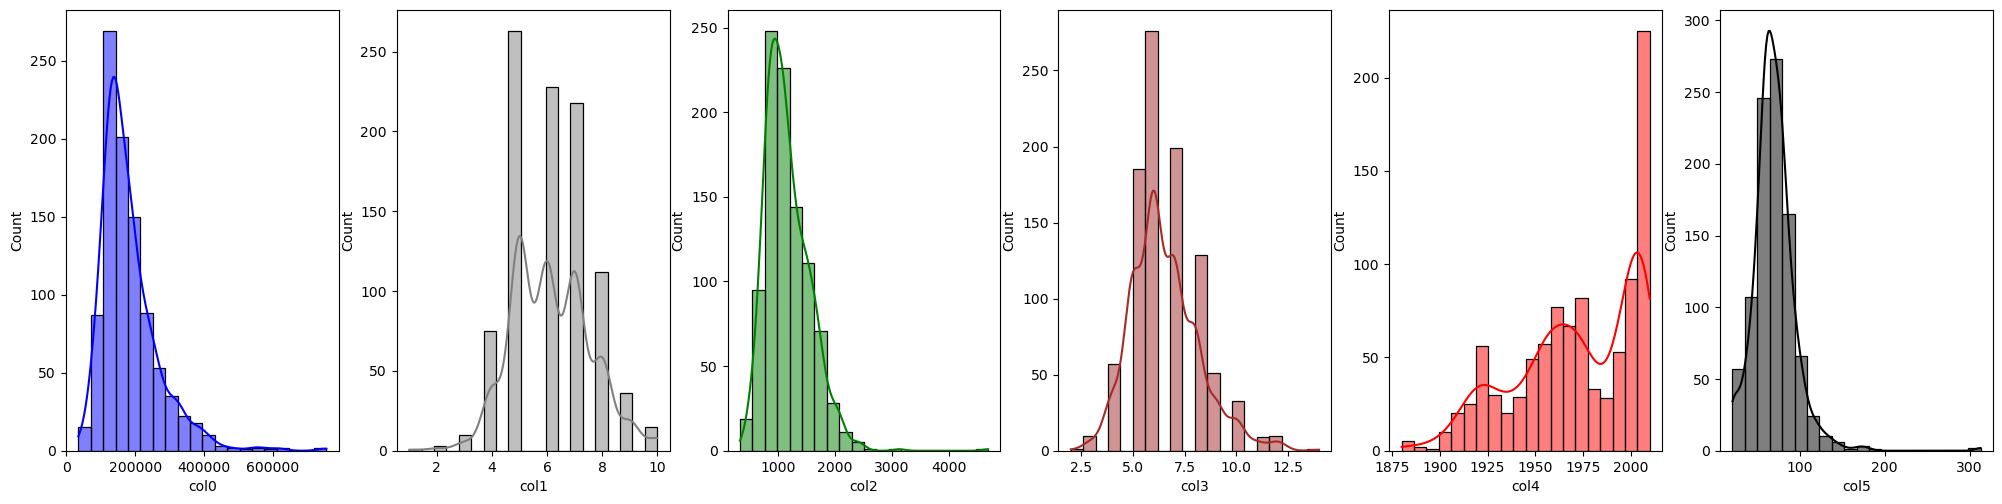

In [368]:
#Grafica Histogramas de cada una de las variables del DataFrame utilizando seaborn
Entrenamiento_data.grafica_histogramas(df_training)

***
## Verificando los coeficientes de correlacion entre las columnas del dataset

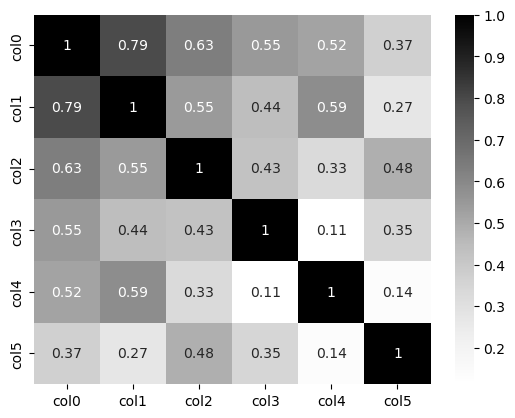

In [369]:
#Calculando la correlación entre cada una de las variables del DataFrame de Entrenamiento
Entrenamiento_data.grafica_heatmap(df_training)

***
## Gráficas de Dispersion, con el título de Coeficiente de correlacion

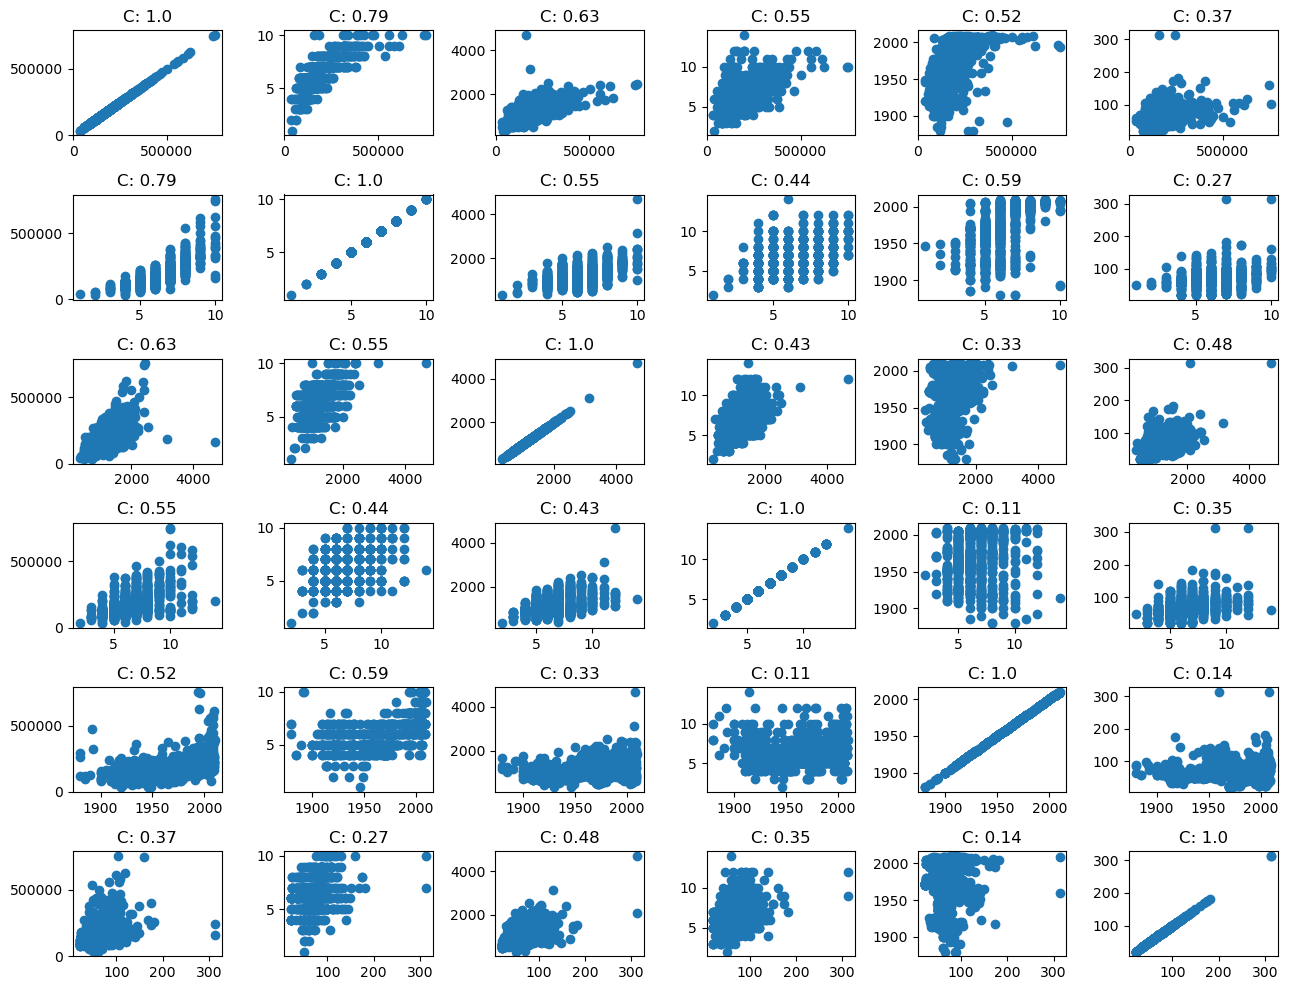

In [370]:
#Graficas de dispersion con el Coeficiente de correlacion como título de la gráfica
Entrenamiento_data.grafica_correlation(df_training)

***
## Entrenamiento de modelo, Grafica de error vs tiempo y Grafica del modelo con el error mínimo


Epoch 500
w: 10025.05 b: 1474.21
error: [1.96423015e+10]


Epoch 1000
w: 16662.79 b: 2441.48
error: [1.05220566e+10]


Epoch 1500
w: 21076.32 b: 3065.25
error: [6.49486585e+09]


Epoch 2000
w: 24011.92 b: 3460.80
error: [4.71639149e+09]


Epoch 2500
w: 25965.48 b: 3704.69
error: [3.93078432e+09]


Epoch 3000
w: 27266.49 b: 3847.84
error: [3.58355423e+09]


Epoch 3500
w: 28133.90 b: 3924.04
error: [3.42987939e+09]


Epoch 4000
w: 28713.19 b: 3955.78
error: [3.36166459e+09]



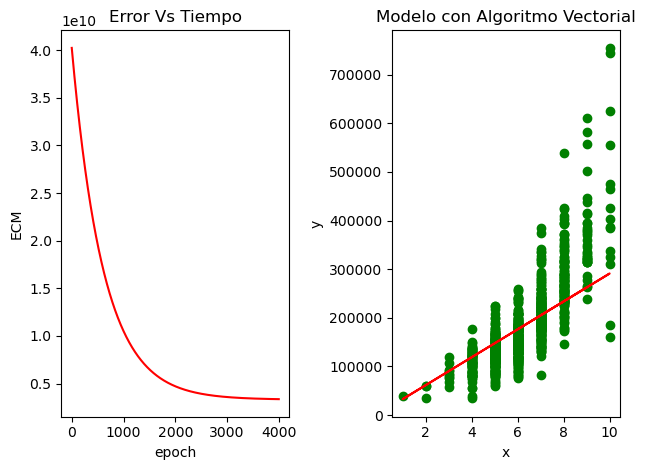

In [371]:
#Seleccionando las columnas a utilizar para el modelo
df_training.plot.scatter(x='col1', y='col0')

#Creando el vector de la variable dependiente
x_0 = df_training['col1'].values
#Creando el vector de la variable independiente
y = df_training['col0'].values

#Inicializando los valores de w y b
w= 40
b= -10

#Parametro de learning rate y cantidad de iteraciones
alpha = 0.00001
epochs_N = 4000

#Vector que almacena el error
error = np.zeros((epochs_N,1))

for i in range(epochs_N):
    #Funcion modelo 1
    [w,b]= Entrenamiento_data.gradiente_descendente(w,b,alpha,x_0,y)
    y_ = Entrenamiento_data.calcular_modelo(w,b,x_0)
    error[i]=Entrenamiento_data.calcular_error(y,y_)
    
    #Almacenar resultados en diccionario key = epochs_N
    #result[i+1] = dict([(i+1,[w,b,error[i]])])
    llave = i+1
    valor = [w, b, error[i]]
    result[llave] = valor
       
    
    #Impresión de error, w, b cada i veces
    if (i+1)%500 == 0:
        print()
        print("Epoch {}".format(i+1))
        print("w: {:.2f}".format(w), "b: {:.2f}".format(b))
        print("error: {}".format(error[i]))
        print("===================================")
        print()
           
Entrenamiento_data.grafica_error_tiempo(epochs_N, error)

y_regr = Entrenamiento_data.calcular_modelo(w,b,x_0)
Entrenamiento_data.grafica_algoritmo_vectorial(x_0,y_regr,y)


***
## Calculando el modelo con Sklearn

Coeficientes:  [[47533.84030183]]
Intersección:  [-110412.65268014]


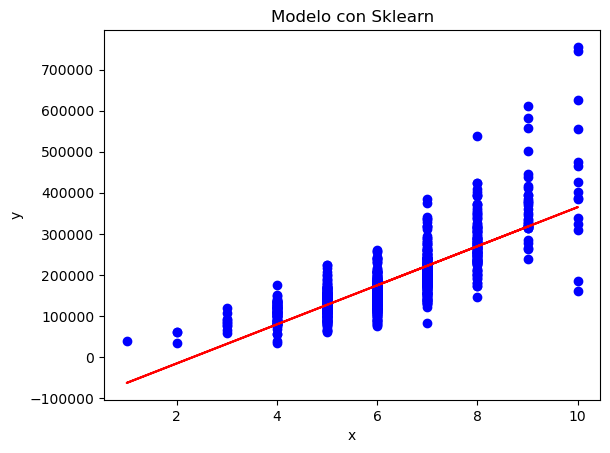

In [372]:
from sklearn import linear_model
from sklearn.metrics import r2_score

def regresion_sklearn(x_1):
    return regres_sklearn.coef_[0][0]*x_1 + regres_sklearn.intercept_[0]

regres_sklearn = linear_model.LinearRegression()
x_1 = np.asanyarray(df_training[['col1']])
y_1 = np.asanyarray(df_training[['col0']])

regres_sklearn.fit(x_1,y_1)

print('Coeficientes: ', regres_sklearn.coef_)
print('Intersección: ', regres_sklearn.intercept_)

y_sklearn = regresion_sklearn(x_1)

plt.scatter(x_0,y,color='blue')
plt.plot(x_1, y_sklearn, '-r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Modelo con Sklearn")
plt.show()


***
## Vector para evaluacion de modelo manual, modelo sklearn y el promedio de ambos

In [373]:
x_adicional = [0, 2, 3, 4.5, 20]

def x_adicion(x_adicional):
    vector_manual = np.zeros((len(x_adicional),1))
    vector_sklearn = np.zeros((len(x_adicional),1))
    vector_promedio = np.zeros((len(x_adicional),1))
    vector_output = np.zeros((len(x_adicional),3))
    indice = 0
    print("Modelo manual    ", "Modelo Sklearn  ", "Promedio Modelos" )
    for iteracion in x_adicional:
   
        vector_manual[indice]   = Entrenamiento_data.calcular_modelo(w,b,iteracion)
        vector_sklearn[indice]  = regresion_sklearn(iteracion)
        vector_promedio[indice] = (vector_manual[indice] + vector_sklearn[indice])/2 
        print(vector_manual[indice],vector_sklearn[indice],vector_promedio[indice])
        indice = indice + 1
        
    return vector_manual, vector_sklearn, vector_promedio

output_ = x_adicion(x_adicional)

print("=========================================")
print("El vector Manual resultante es: ")
print(output_[0])
print("=========================================")
print("El vector Sklearn resultante es: ")
print(output_[1])
print("=========================================")
print("El vector promedio resultante es: ")
print(output_[2])

Modelo manual     Modelo Sklearn   Promedio Modelos
[3955.77673897] [-110412.65268014] [-53228.43797059]
[61382.15082781] [-15344.97207648] [23018.58937566]
[90095.33787223] [32188.86822534] [61142.10304878]
[133165.11843885] [103489.62867809] [118327.37355847]
[578219.51762735] [840264.15335642] [709241.83549188]
El vector Manual resultante es: 
[[  3955.77673897]
 [ 61382.15082781]
 [ 90095.33787223]
 [133165.11843885]
 [578219.51762735]]
El vector Sklearn resultante es: 
[[-110412.65268014]
 [ -15344.97207648]
 [  32188.86822534]
 [ 103489.62867809]
 [ 840264.15335642]]
El vector promedio resultante es: 
[[-53228.43797059]
 [ 23018.58937566]
 [ 61142.10304878]
 [118327.37355847]
 [709241.83549188]]


***
## Tomando los valores del set de validacion 20%

In [374]:
x_test = df_test['col1'].values
y_test = df_test['col0'].values

output_validacion = x_adicion(x_test)


Modelo manual     Modelo Sklearn   Promedio Modelos
[147521.71196106] [127256.548829] [137389.13039503]
[147521.71196106] [127256.548829] [137389.13039503]
[147521.71196106] [127256.548829] [137389.13039503]
[262374.46013874] [317391.91003631] [289883.18508753]
[176234.89900548] [174790.38913083] [175512.64406815]
[176234.89900548] [174790.38913083] [175512.64406815]
[176234.89900548] [174790.38913083] [175512.64406815]
[233661.27309432] [269858.06973448] [251759.6714144]
[176234.89900548] [174790.38913083] [175512.64406815]
[204948.0860499] [222324.22943266] [213636.15774128]
[204948.0860499] [222324.22943266] [213636.15774128]
[204948.0860499] [222324.22943266] [213636.15774128]
[233661.27309432] [269858.06973448] [251759.6714144]
[118808.52491664] [79722.70852717] [99265.61672191]
[262374.46013874] [317391.91003631] [289883.18508753]
[176234.89900548] [174790.38913083] [175512.64406815]
[147521.71196106] [127256.548829] [137389.13039503]
[147521.71196106] [127256.548829] [137389.130

***
## Calculando el error de los modelos y creación de las graficas

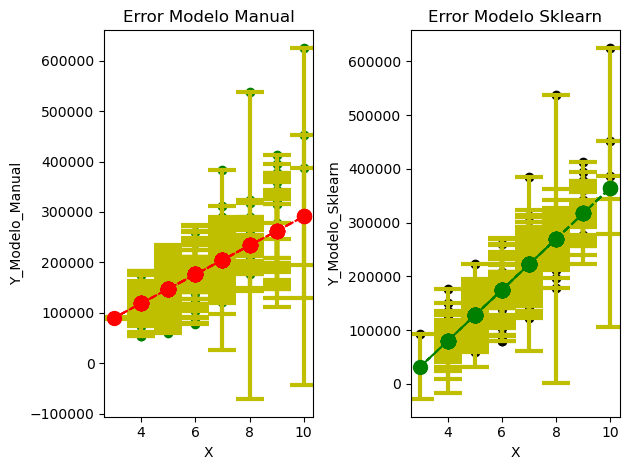

In [375]:
#Calculando el error para cada uno de los modelos
error_modelo_manual = np.zeros((len(y_test),1))
error_modelo_sklearn = np.zeros((len(y_test),1))

#Almacenando los errores en vectores para poder graficarlos
for i_validacion in range(len(y_test)):
    error_modelo_manual[i_validacion] = (y_test[i_validacion]-output_validacion[0][i_validacion])
    error_modelo_sklearn[i_validacion]= (y_test[i_validacion]-output_validacion[1][i_validacion])

error_delmodelomanual = list(error_modelo_manual)
grafica_error = np.absolute(error_modelo_manual.flatten().tolist())
error_delmodelosklearn = list(error_modelo_sklearn)
grafica_error_sklearn = np.absolute(error_modelo_sklearn.flatten().tolist())

#Y estimado para compararlo con el set de prueba
y_regr_manual = Entrenamiento_data.calcular_modelo(w,b,x_test)
y_regr_sklearn = regresion_sklearn(x_test)

plt.subplot(1,2,1)
plt.scatter(x_test, y_test, color='green')
plt.errorbar(x_test, y_regr_manual,  yerr=grafica_error, fmt = '--ro', ms=10, ecolor='y', elinewidth = 3, capsize = 10, capthick = 3)
plt.xlabel('X')
plt.ylabel('Y_Modelo_Manual')
plt.title('Error Modelo Manual')
plt.tight_layout()

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, color='black')
plt.errorbar(x_test, y_regr_sklearn,  yerr=grafica_error_sklearn, fmt = '--go', ms=10, ecolor='y', elinewidth = 3, capsize = 10, capthick = 3)
plt.xlabel('X')
plt.ylabel('Y_Modelo_Sklearn')
plt.title('Error Modelo Sklearn')
plt.tight_layout()

plt.show()

## El mejor modelo es el aplicado con la librería sklearn, se verifica que el error a lo largo de los valores evaluados es menor comparado con el que se realiza con el algoritmo manual